In [ ]:
  #loading libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [ ]:
#importing dataset
import pandas as pd
df=pd.read_csv('/content/Data_mining_dataset.csv')
print(df.head())

                  date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36         NaN   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  

In [ ]:
# Check basic info
print("Initial shape:", df.shape)
print(df.info())
print(df.describe())

Initial shape: (737453, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   700581 non-null  float64
 2   % Silica Feed                 700581 non-null  float64
 3   Starch Flow                   700581 non-null  float64
 4   Amina Flow                    700581 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data[missing_data > 0])

Missing values per column:
 % Iron Feed      36872
% Silica Feed    36872
Starch Flow      36872
Amina Flow       36872
dtype: int64


In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 1093


In [ ]:
# details for duplicate
df[duplicates].head(10)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
8692,2017-03-12 01:00:00,58.84,11.46,3574.22,538.330,394.629,9.83691,1.74000,245.435,188.306,...,251.367,475.964,352.870,472.650,322.660,354.150,510.770,424.300,64.29,3.62
303866,2017-06-01 15:00:00,64.03,6.26,3128.91,570.679,395.215,9.87109,1.69214,299.927,297.070,...,303.662,614.099,502.969,598.362,453.516,472.020,454.208,484.443,66.39,1.22
303867,2017-06-01 15:00:00,64.03,6.26,3128.91,570.679,395.215,9.87109,1.69214,299.927,297.070,...,303.662,614.099,502.969,598.362,453.516,472.020,454.208,484.443,66.39,1.22
303869,2017-06-01 15:00:00,64.03,6.26,3128.91,570.679,395.215,9.87109,1.69214,299.927,297.070,...,303.662,614.099,502.969,598.362,453.516,472.020,454.208,484.443,66.39,1.22
420639,2017-06-28 15:00:00,50.70,23.17,3367.19,433.960,401.367,9.50195,1.62732,299.268,303.003,...,299.268,401.392,372.695,383.621,412.891,389.953,393.161,395.610,64.36,3.61
420640,2017-06-28 15:00:00,50.70,23.17,3367.19,433.960,401.367,9.50195,1.62732,299.268,303.003,...,299.268,401.392,372.695,383.621,412.891,389.953,393.161,395.610,64.36,3.61
420641,2017-06-28 15:00:00,50.70,23.17,3367.19,433.960,401.367,9.50195,1.62732,299.268,303.003,...,299.268,401.392,372.695,383.621,412.891,389.953,393.161,395.610,64.36,3.61
420642,2017-06-28 15:00:00,50.70,23.17,3367.19,433.960,401.367,9.50195,1.62732,299.268,303.003,...,299.268,401.392,372.695,383.621,412.891,389.953,393.161,395.610,64.36,3.61
420643,2017-06-28 15:00:00,50.70,23.17,3367.19,433.960,401.367,9.50195,1.62732,299.268,303.003,...,299.268,401.392,372.695,383.621,412.891,389.953,393.161,395.610,64.36,3.61
420644,2017-06-28 15:00:00,50.70,23.17,3367.19,433.960,401.367,9.50195,1.62732,299.268,303.003,...,299.268,401.392,372.695,383.621,412.891,389.953,393.161,395.610,64.36,3.61


In [ ]:
#Clean and convert data types
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.replace(",", ".")
        try:
            df[col] = df[col].astype(float)
        except:
            continue

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df.head())

                 date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0 2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1 2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2 2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3 2017-03-10 01:00:00         55.2          16.98      3047.36         NaN   
4 2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  Flotat

In [ ]:
# Check for any not a time values after conversion
print("NaT in date column:", df['date'].isnull().sum())

NaT in date column: 0


In [ ]:
# Describe the dataset
print(df.describe())

                                date    % Iron Feed  % Silica Feed  \
count                         737453  700581.000000  700581.000000   
mean   2017-06-16 03:27:22.656549376      56.296145      14.652419   
min              2017-03-10 01:00:00      42.740000       1.310000   
25%              2017-05-04 23:00:00      52.670000       8.940000   
50%              2017-06-16 15:00:00      56.080000      13.850000   
75%              2017-07-29 07:00:00      59.720000      19.600000   
max              2017-09-09 23:00:00      65.780000      33.400000   
std                              NaN       5.158465       6.807373   

         Starch Flow     Amina Flow  Ore Pulp Flow    Ore Pulp pH  \
count  700581.000000  700581.000000  737453.000000  737453.000000   
mean     2869.249254     488.155777     397.578372       9.767639   
min         0.002026     241.669000     376.249000       8.753340   
25%      2075.990000     431.823000     394.264000       9.527360   
50%      3018.738012    

In [ ]:
#TECHNIQUE 1:ANOMALY DETECTION (ISOLATION FOREST)
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select only numeric columns for anomaly detection
numeric_cols = df.select_dtypes(include='number').columns
sensor_data = df[numeric_cols]

In [ ]:
# Scale the data for Isolation Forest
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sensor_data)

In [ ]:
# Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(scaled_data)

In [ ]:
# Extract and display outliers
outliers_df = df[df['outlier'] == -1]
print("Detected outliers:")
print(outliers_df)

Detected outliers:
                      date  % Iron Feed  % Silica Feed  Starch Flow  \
640    2017-03-10 04:00:00        55.20          16.98          NaN   
643    2017-03-10 04:00:00        55.20          16.98          NaN   
662    2017-03-10 04:00:00        55.20          16.98          NaN   
754    2017-03-10 05:00:00        55.20          16.98      3412.50   
772    2017-03-10 05:00:00        55.20          16.98      3767.68   
...                    ...          ...            ...          ...   
737228 2017-09-09 22:00:00        49.75          23.20      3943.40   
737337 2017-09-09 23:00:00        49.75          23.20      4380.77   
737339 2017-09-09 23:00:00        49.75          23.20      4687.99   
737422 2017-09-09 23:00:00        49.75          23.20      3190.93   
737437 2017-09-09 23:00:00        49.75          23.20      2998.83   

        Amina Flow  Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
640        601.532     397.734000      9.94744           1.7

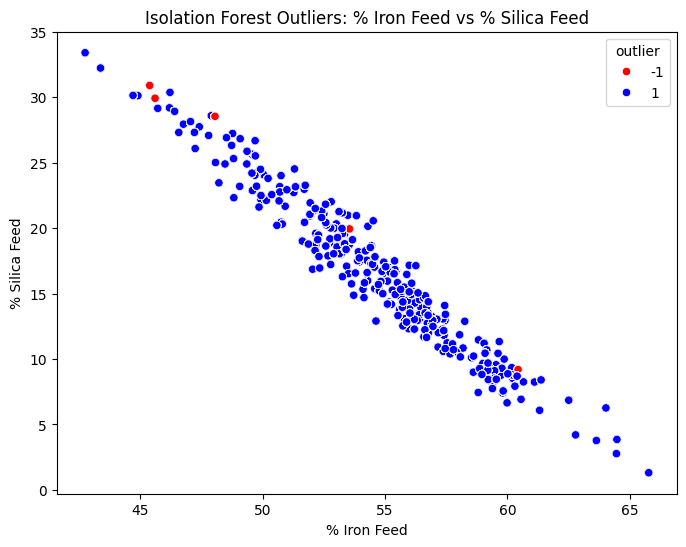

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='% Iron Feed', y='% Silica Feed', hue='outlier', palette={1: 'blue', -1: 'red'})
plt.title('Isolation Forest Outliers: % Iron Feed vs % Silica Feed')
plt.show()

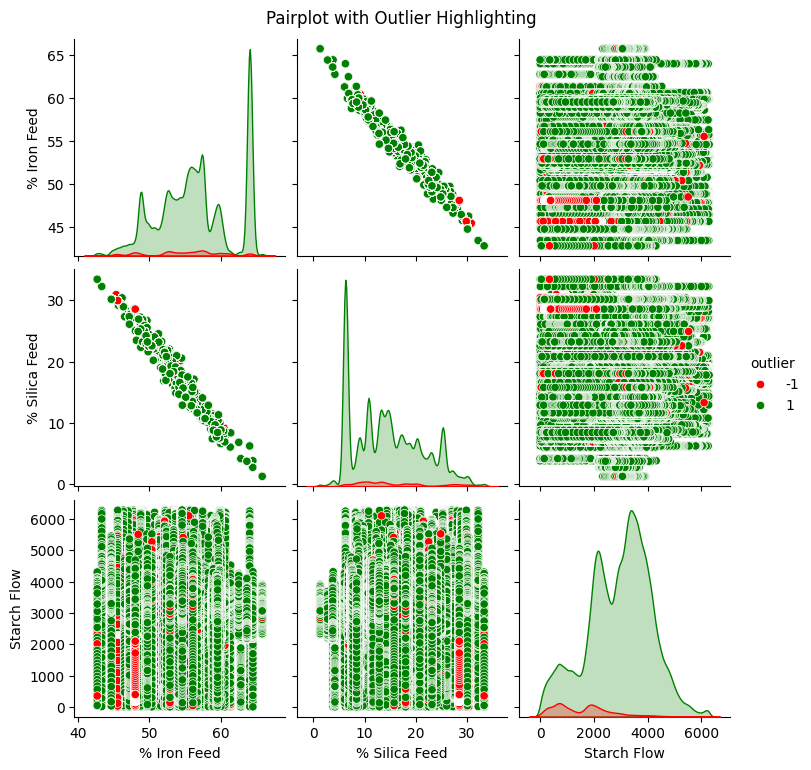

In [ ]:
# Analyzing few columns to keep pairplot readable
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns to include in the pairplot
cols_to_plot = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'outlier']

# Create the pairplot
pairplot = sns.pairplot(data=df[cols_to_plot],hue='outlier',palette={1: 'green', -1: 'red'})
pairplot.fig.suptitle('Pairplot with Outlier Highlighting', y=1.02)
plt.show()



# WE use this technique to detect the outlier in each **element** and sensor detector fault **bold text**

In [ ]:
# -----------------------------------TECHNIQUE 2: TIME SERIES ANALYSIS (LSTM)------------------------------------------
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Select relevant features
features = ['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density']
targets = ['% Iron Concentrate', '% Silica Concentrate']

In [ ]:
# Prepare input (X) and output (y) variables
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[targets])


In [ ]:
# Create time series sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

In [ ]:
# Split into train and test
split_index = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(2))  # Output layer for 2 targets
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - loss: 0.0376 - val_loss: 0.0427
Epoch 2/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 149s 7ms/step - loss: 0.0376 - val_loss: 0.0432
Epoch 3/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 141s 6ms/step - loss: 0.0371 - val_loss: 0.0433
Epoch 4/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 140s 6ms/step - loss: 0.0372 - val_loss: 0.0434
Epoch 5/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 144s 7ms/step - loss: 0.0369 - val_loss: 0.0431
Epoch 6/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - loss: 0.0371 - val_loss: 0.0438
Epoch 7/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - loss: 0.0376 - val_loss: 0.0436
Epoch 8/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 99s 7ms/step - loss: 0.0373 - val_loss: 0.0438
Epoch 9/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 143s 7ms/step - loss: 0.0371 - val_loss: 0.0434
Epoch 10/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 142s 7ms/step - loss: 0.0373 - val_loss: 0.0430
Epoch 11/20
15016/15016 ━━━━━━━━━━━━━━━━━━━━ 142s 7ms/step - loss: 0.0374 - val_lo

In [ ]:
# Predict
y_pred = model.predict(X_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)


3422/3754 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
#Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

RMSE: 0.7592, MAE: 0.6388


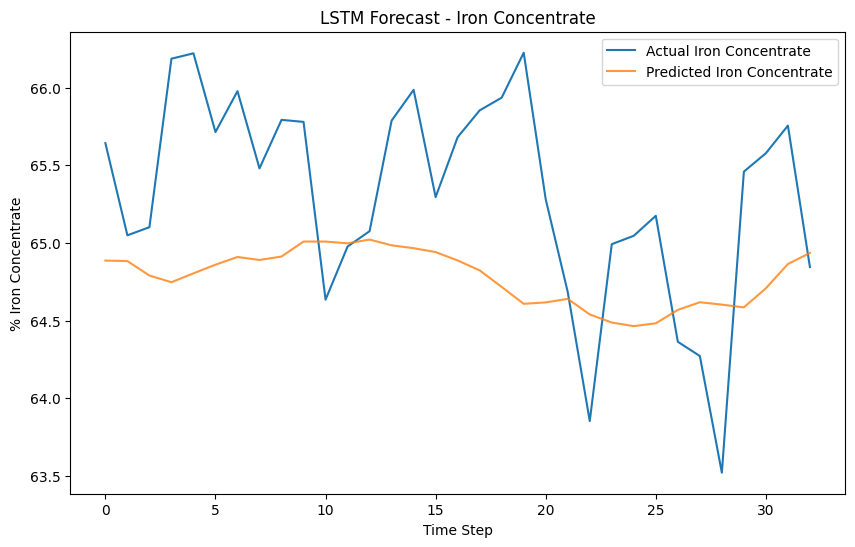

In [ ]:
# Visualize prediction vs actual for Iron Concentrate
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse[:, 0], label='Actual Iron Concentrate')
plt.plot(y_pred_inverse[:, 0], label='Predicted Iron Concentrate', alpha=0.8)
plt.title('LSTM Forecast - Iron Concentrate')
plt.xlabel('Time Step')
plt.ylabel('% Iron Concentrate')
plt.legend()
plt.show()

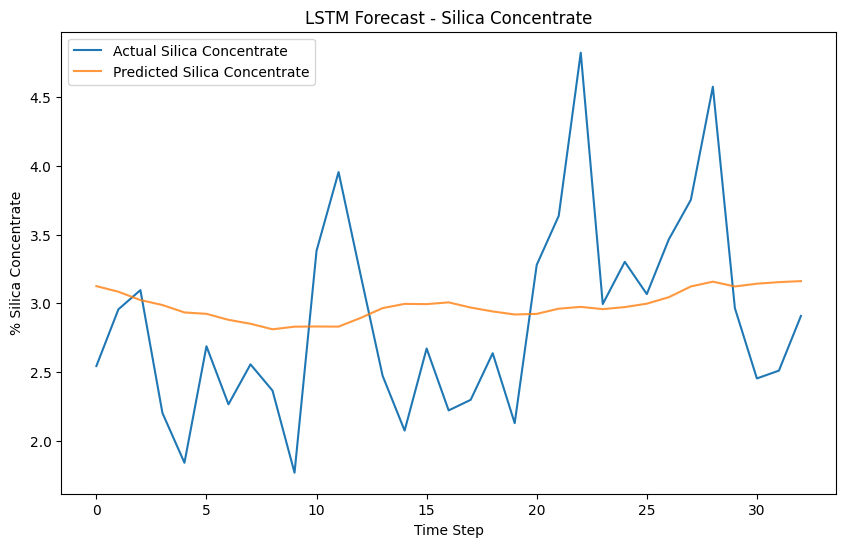

In [ ]:
# Visualize prediction vs actual for Silica Concentrate
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse[:, 1], label='Actual Silica Concentrate')
plt.plot(y_pred_inverse[:, 1], label='Predicted Silica Concentrate', alpha=0.8)
plt.title('LSTM Forecast - Silica Concentrate')
plt.xlabel('Time Step')
plt.ylabel('% Silica Concentrate')
plt.legend()
plt.show()

In [ ]:
#---------------------------------- TECHNIQUE 3 : CLASSIFICATION (LOGISTIC REGRESSION)-------------------------------------------#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [ ]:
# Select numerical features and create classification target
numerical_features = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow','Ore Pulp pH', 'Ore Pulp Density','% Iron Concentrate', '% Silica Concentrate']

In [ ]:
# Create binary target: 1 = High Iron Concentrate (>= 60), 0 = Low
df = df.dropna(subset=numerical_features + ['% Iron Concentrate'])
print(df['% Iron Concentrate'].describe())
# Drop missing values
df['Iron_Class'] = df['% Iron Concentrate'].apply(lambda x: 1 if x >= 60 else 0)

count    600632.000000
mean         65.608976
std           2.669652
min          62.050000
25%          64.430000
50%          65.270000
75%          65.990000
max          76.236515
Name: % Iron Concentrate, dtype: float64


In [ ]:
#  Prepare features (X) and target (y)
X = df[numerical_features]
y = df['Iron_Class']

In [ ]:
#  Feature scaling important for models like Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42 , stratify=y)
print(y_train.value_counts())


Iron_Class
1    480505
Name: count, dtype: int64


In [ ]:
# Train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


In [ ]:
#  Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[26  0]
 [ 3  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.67      0.80         9

    accuracy                           0.91        35
   macro avg       0.95      0.83      0.87        35
weighted avg       0.92      0.91      0.91        35



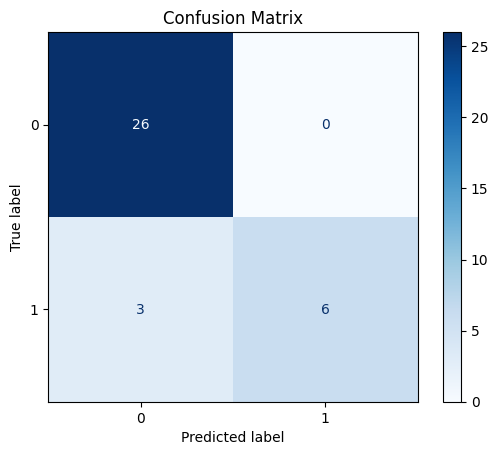

In [ ]:
# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

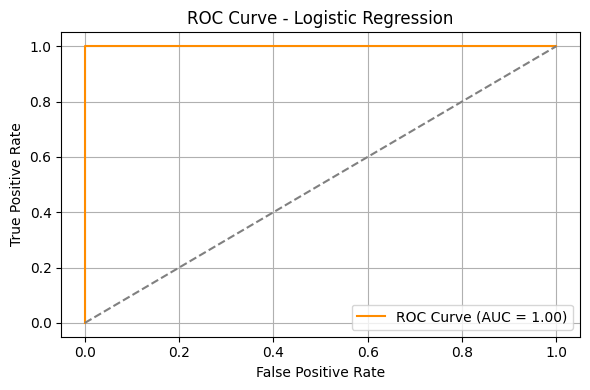

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc)


Accuracy: 0.9142857142857143
AUC Score: 1.0


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:

# Load your dataset
df = pd.read_csv("/content/Data_mining_dataset.csv")  # Replace with your actual file

# Choose your features and targets - Replace with actual column names from your dataset
features = ['% Iron Feed', '% Silica Feed', 'Starch Flow']  # Example: Adjust to your actual features
targets = ['% Iron Concentrate', '% Silica Concentrate']  # Example: Adjust to your actual targets

# Normalize (scale) the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[targets])


In [ ]:
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])  # e.g., 0–9, then 1–10, ...
        ys.append(y[i+time_steps])    # predict the next time step
    return np.array(Xs), np.array(ys)

# Create sequences (e.g., using 10 time steps)
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)


In [ ]:
split_index = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]


In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(2))  # Because we have 2 targets
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 134s 8ms/step - loss: nan - val_loss: nan
Epoch 2/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 125s 8ms/step - loss: nan - val_loss: nan
Epoch 3/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step - loss: nan - val_loss: nan
Epoch 4/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 133s 8ms/step - loss: nan - val_loss: nan
Epoch 5/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 125s 8ms/step - loss: nan - val_loss: nan
Epoch 6/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 125s 7ms/step - loss: nan - val_loss: nan
Epoch 7/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 134s 8ms/step - loss: nan - val_loss: nan
Epoch 8/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 139s 8ms/step - loss: nan - val_loss: nan
Epoch 9/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 125s 7ms/step - loss: nan - val_loss: nan
Epoch 10/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 139s 7ms/step - loss: nan - val_loss: nan
Epoch 11/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 151s 8ms/step - loss: nan - val_loss: nan
Epoch 12/20
16667/16667 ━━━━━━━━━━━━━━━━━━━━ 131s 8m

In [ ]:
y_pred = model.predict(X_test)

# Inverse transform to get real-world values
y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)


4167/4167 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ... (rest of your code remains the same)

# Before calculating RMSE and MAE, handle NaN values:
y_test_inverse = np.nan_to_num(y_test_inverse)  # Replace NaN with 0
y_pred_inverse = np.nan_to_num(y_pred_inverse)  # Replace NaN with 0

rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")


RMSE: 46.4526, MAE: 34.1719


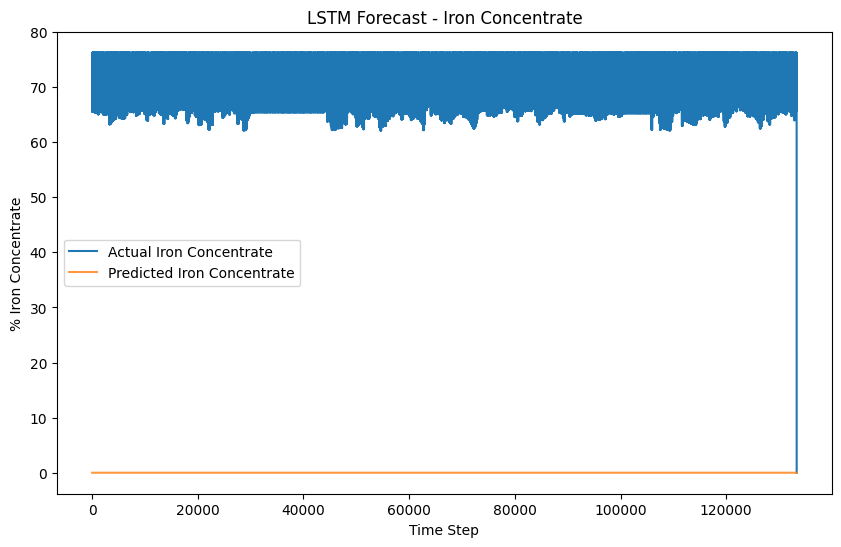

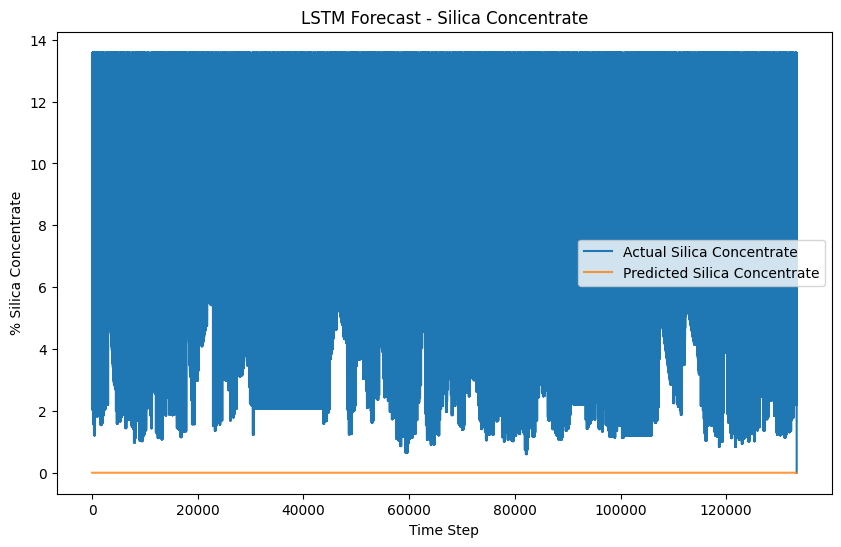

In [ ]:
# Plot Iron Concentrate
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse[:, 0], label='Actual Iron Concentrate')
plt.plot(y_pred_inverse[:, 0], label='Predicted Iron Concentrate', alpha=0.8)
plt.title('LSTM Forecast - Iron Concentrate')
plt.xlabel('Time Step')
plt.ylabel('% Iron Concentrate')
plt.legend()
plt.show()

# Plot Silica Concentrate
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse[:, 1], label='Actual Silica Concentrate')
plt.plot(y_pred_inverse[:, 1], label='Predicted Silica Concentrate', alpha=0.8)
plt.title('LSTM Forecast - Silica Concentrate')
plt.xlabel('Time Step')
plt.ylabel('% Silica Concentrate')
plt.legend()
plt.show()
